In [1]:
#This is a project that uses titanic data for analyze if class, gender and age influenced who survived in titanic accident
#First of all I started importing the basics
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [2]:
#Set up the titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [3]:
#take a look in the Data.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Looking all information in the Dataset 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Doing a data analisys it is about to answer questions
#First one: Who were the passangers on the titanic?


In [6]:
#Importing what I will need for the analisys and visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

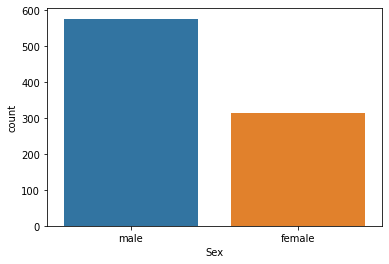

In [7]:
#About gender, how many men and women were there?
sns.countplot('Sex',data=titanic_df)

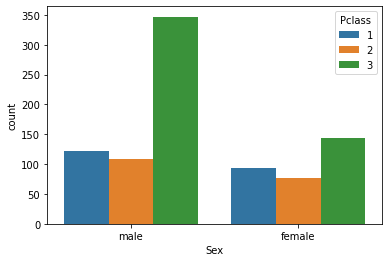

In [8]:
#Genders by classes 
sns.countplot('Sex',data=titanic_df,hue='Pclass')

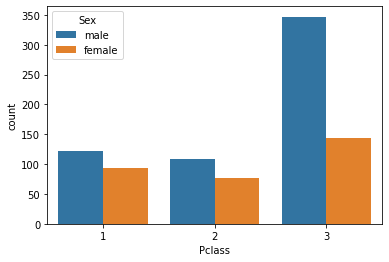

In [9]:
#exchange the parameters 
sns.countplot('Pclass',data=titanic_df,hue='Sex')

In [10]:
#So there were much more men than women in the thirdy class, in the first class were almost the same quantity

In [11]:
#Now I want to know how many women and children were there. Everyone with less than 16 I will consider a child

#Doing a function to search the children
def male_female_child(passanger):
    Age,Sex = passanger
    if Age < 16:
        return 'child'
    else:
        return Sex
#doing a new collumn 'person'
#always specify axis=1 for columns
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [12]:
#Now I look if the function worked
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [13]:
#Now I know who were man, women and child. 

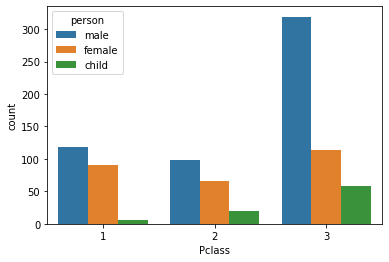

In [14]:
#The divion of men, women and child by classes. There were few children in first and second classes
sns.countplot('Pclass', data=titanic_df,hue='person')

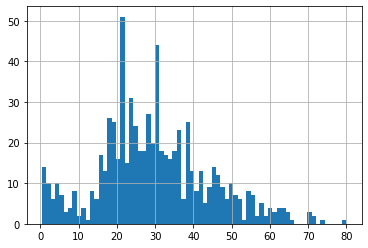

In [15]:
titanic_df['Age'].hist(bins=70)

In [16]:
#The mean of age was...
titanic_df['Age'].mean()

29.69911764705882

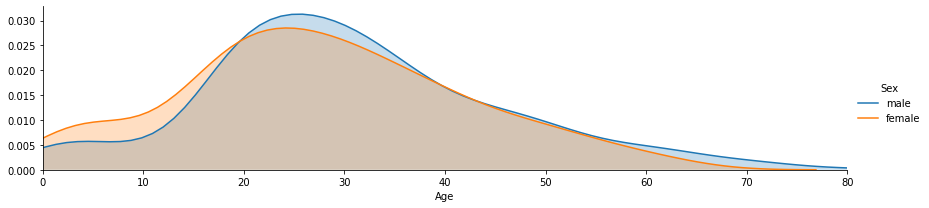

In [17]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

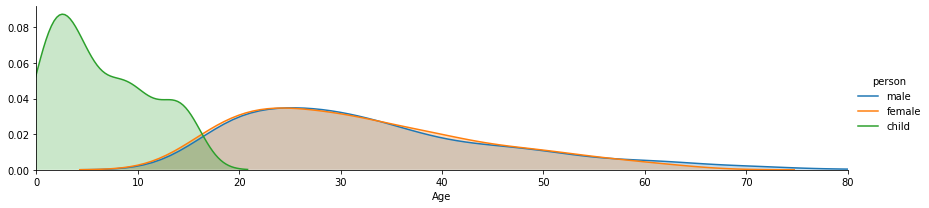

In [18]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

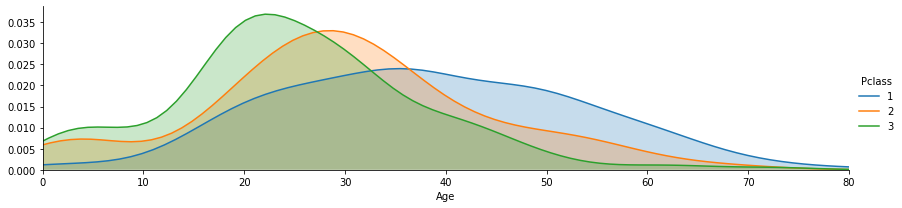

In [19]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
#Now lets go to second question:
#What deck were the passengers on and how does that relate to their class

In [22]:
#First of all: I will drop the NaN values and create a new object deck
deck = titanic_df['Cabin'].dropna()

In [23]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [24]:
#So its possible notice that we need the first letter of the deck to classify its level

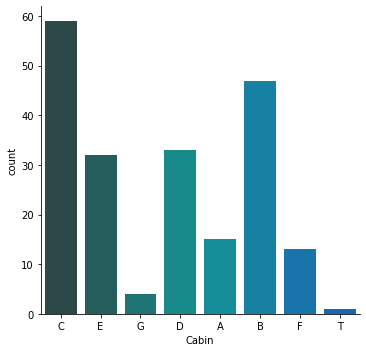

In [25]:
#I will do the classification with a for loop

levels =[]

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

In [26]:
#The T cabin doesnt make sense, so I will drop it.

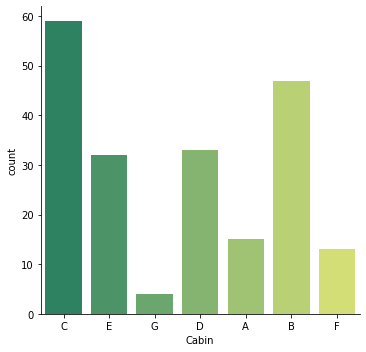

In [27]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

#Replot
sns.catplot('Cabin',data=cabin_df,palette='summer',kind='count')

In [28]:
#At the Embarked column has  C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [30]:
#So I can answer the question:
#Where did the passangers come from?

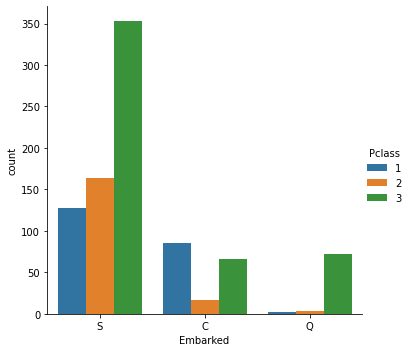

In [31]:
sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

In [32]:
#Who was alone and who was with family?

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [34]:
#With the sum of SibSp and Parch I know if the person is alone or not
#if the sum = 0, alone. Otherwise, With Family

In [35]:
titanic_df['Alone'] = titanic_df.SibSp+titanic_df.Parch
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [36]:
#I defined a function for classify and to create a column with the status, alone or with family!

In [37]:
def alone(Alone):
    if Alone==0:
        return 'Alone'
    else:
        return 'With Family'

In [38]:
titanic_df['Family'] = titanic_df['Alone'].apply(alone)

In [39]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,Alone


In [40]:
#Now lets take a look by graphics

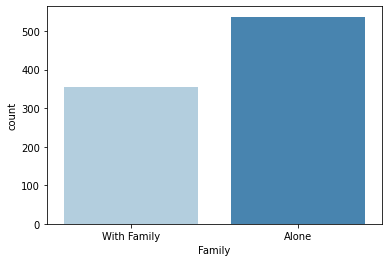

In [41]:
sns.countplot('Family',data=titanic_df,palette='Blues')

In [ ]:
#What helped people to survive? 

In [42]:
#First: Create a new column organizing the information
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

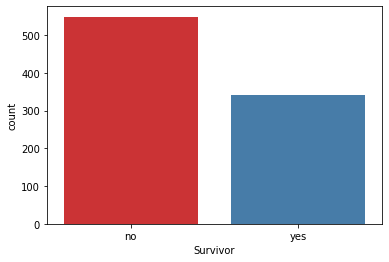

In [43]:
sns.countplot('Survivor',data=titanic_df,palette='Set1')

In [44]:
#Lets take a look if the class affected the ration of survivor

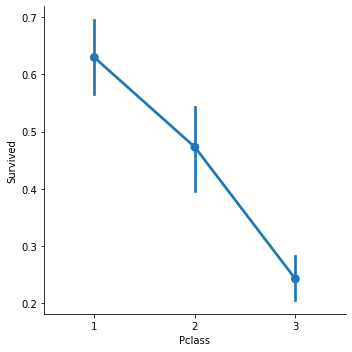

In [52]:
sns.catplot('Pclass','Survived',data=titanic_df,kind='point')

In [53]:
#The number of survivors in the third class was substantially lower!! Why? Maybe because there were more men there?
#The policy of women and children first?

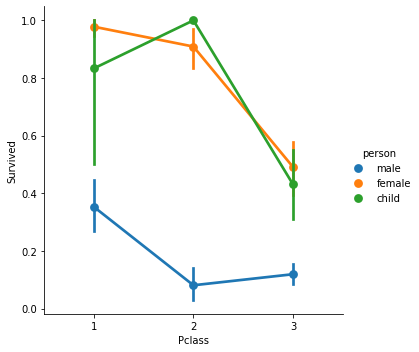

In [54]:
sns.catplot('Pclass','Survived',hue='person',data=titanic_df,kind='point')

In [55]:
#Aparentely be a men were bad, principally in the third class.
#And about age...

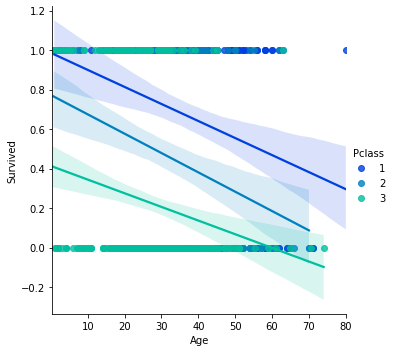

In [58]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

In [ ]:
#The older passegers were that less survived, even in the first class